#### 6- Write a program to implement the ***naïve Bayesian*** classifier for a sample training data set stored as a .CSV file. Compute the accuracy of the classifier, considering few test data sets.

,color,type,origin,stolen
0,red,sports,domestic,yes
1,red,sports,imported,no
2,yellow,suv,imported,yes
3,red,sports,domestic,yes
4,red,sports,imported,no
5,yellow,suv,imported,yes
6,yellow,suv,imported,yes
7,yellow,sports,imported,no


Enter your new car feature color,type,origin


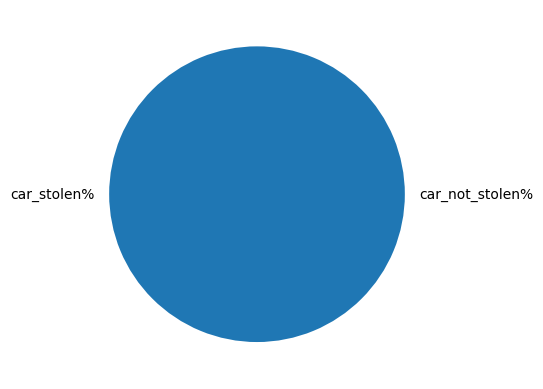

Percentages_yes= 100.0 Percentage_no= 0.0


In [8]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt


def Bayes(DATA,x,col,yescount,nocount):
    xyes=0
    xno=0
    for line in DATA:
        if line[col]==x:
            if line[-1]=='yes':
                xyes+=1
            else:
                xno+=1
    pxyes=xyes/yescount
    pxno=xno/nocount
    return pxyes,pxno


def main():
    file=r"data/car.csv"
    temp=pd.read_csv(file)
    display(temp)
    data=[]
    fd=csv.reader(open(file))
    for line in fd:
        data.append(line)
    DATA=data[1:]
    n=len(DATA)
    yescount=0
    nocount=0
    for line in DATA:
        if line[-1]=='yes':
            yescount+=1
        else:
            nocount+=1
    pyes=yescount/n
    pno=nocount/n
    print("Enter your new car feature color,type,origin")
    x,y,z=input().split()
    pxyes,pxno=Bayes(DATA,x,0,yescount,nocount)
    pyyes,pyno=Bayes(DATA,y,1,yescount,nocount)
    pzyes,pzno=Bayes(DATA,z,2,yescount,nocount)
    resyes=pxyes*pyyes*pzyes*pyes
    resno=pxno*pyno*pzno*pno
    Percentageyes=(resyes/(resyes+resno))*100
    Percentageno=(resno/(resyes+resno))*100
    Pex=[Percentageyes,Percentageno]
    label=["car_stolen%","car_not_stolen%"]
    plt.pie(Pex,labels=label)
    plt.show()
    print("Percentages_yes=",Percentageyes,"Percentage_no=",Percentageno)

    

main()